<a href="https://colab.research.google.com/github/sarathsajan/dream11-predictor/blob/main/Dream11_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a newbie's first step into data analysis, so bear with me if I do steps which are completely absurd and outright wrong. Also i dont have thousands of datapoints, each data point had to be manually filled from the dream11 app after each game. So if someone has any better ideas to get the data, please shoot I am all ears.

That said, IPL is back and I recently started playing Dream11 as I had nothing else to do. There were so many low-cost paid matches, which had some pretty big prize money but unfortunately the bigger the amount is so is the participation. I knew I would struggle if I outright played with cash, so as a start I did what all great pro players do. I decided to go for the practice matches.

And so I went for the 10000 slot competetion. The first team I created was a completely random team with which I got 8000ish rank out of 10000. Even though it was completely random I started getting the feel of it and the next team made it to sub-6000 rank. By the third match I was getting in the grove of making teams which could easily break the sub-5000 rank and rarely going above 5000.

TODO : fill in the intro story here

#Libraries used

In this project we will use the following libraries
* numpy: for fast manipulation & calculation of large, multi-dimensional arrays and matrices
* pandas: for data manipulation and analysis
* seaborn: for plotting and visualising data
* matplotlib: plotting and visualising data

In [10]:
#from google.colab import files
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
So here's the csv file I created. It contains the details of only those matches that I competed in, as Dream11 wouldn't allow to see the player points of past matches which I haven't competed in.

In [11]:
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['d11_dataset.csv']))
df = pd.read_csv('https://raw.githubusercontent.com/sarathsajan/dream11-predictor/main/d11-dataset.csv')

# Exploring the data
Lets do some data exploration before starting with the analysis

In [12]:
print (df.head())
print (df.info())
print (df.describe())

   selection_percent  type team  points
0              47.67  bowl   rr      97
1               9.74  bowl  kkr      79
2              79.17  bowl   rr      74
3              94.60   bat  kkr      66
4              52.30  bowl  kkr      64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selection_percent  198 non-null    float64
 1   type               198 non-null    object 
 2   team               198 non-null    object 
 3   points             198 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ KB
None
       selection_percent      points
count         198.000000  198.000000
mean           48.838939   36.989899
std            26.108259   28.482070
min             2.560000   -2.000000
25%            24.262500   12.250000
50%            49.615000   33.000000
75%            71.970000   54.000000
max  

Now we know that the dataframe contains selection_percent, type, team and points as the columns.
* selection_percent: the percentage of participants who selected that player
* type: the role of player which includes
  * batsman
  * bowler
  * all-rounder
  * wicket-keeper
* team: the team that player represents. The teams in IPL 2020 season are
  * Chennai Super Kings *CSK*
  * Kings XI Punjab *KXIP*
  * Mumbai Indians *MI*
  * Delhi Capitals *DC*
  * Royal Challengers Bangalore *RCB*
  * Sunrisers Hyderabad *SRH*
  * Kolkata Knight Riders *KKR*
  * Rajasthan Royals *RR*

# Graphing and visualising the data

First lets plot the simple *points v/s selection_percent* graph

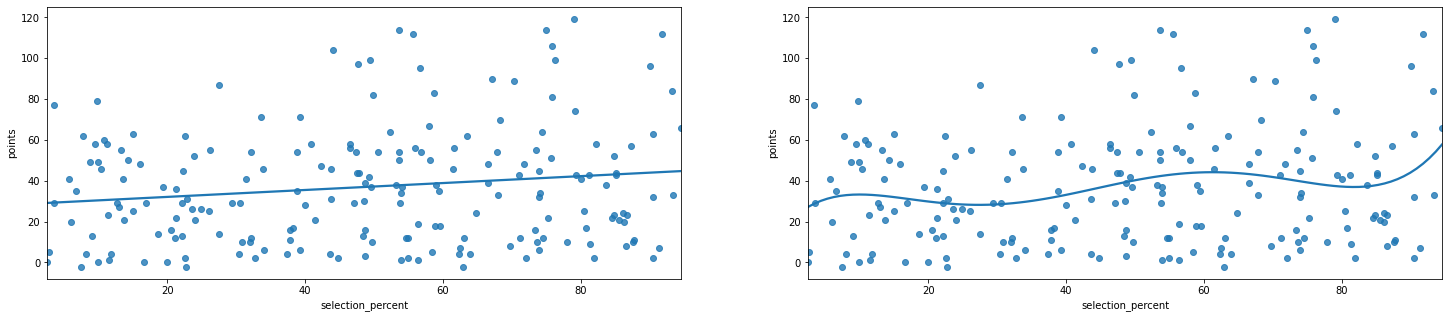

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(25,5))
sns.regplot(data=df, x='selection_percent', y='points', ci=0, order=1, ax=axis[0] )
sns.regplot(data=df, x='selection_percent', y='points', ci=0, order=6, ax=axis[1]);

#curve = np.polyfit(x=df['selection_percent'], y=df['points'], deg=7)
#print (curve)

Now lets visualise the data in different groups
* First we will plot selection_percent against points with additional grouping by teams
* Second combination will be same as the first one except this type the groupings will be based on the type

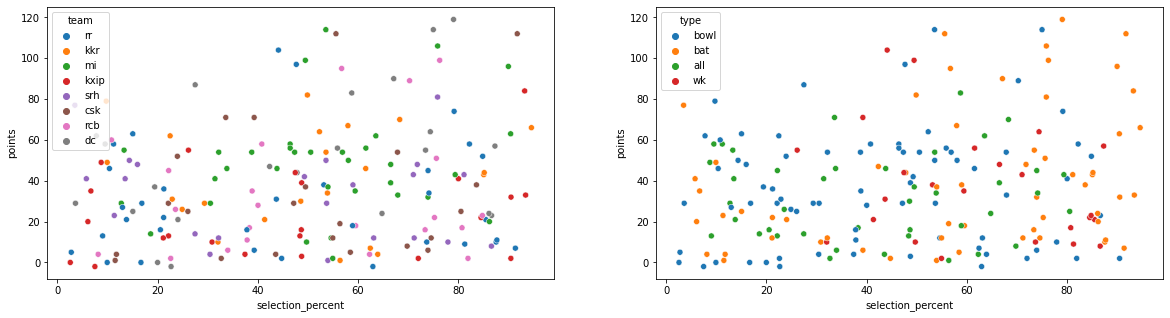

In [14]:
fig, axis = plt.subplots(ncols=2, figsize=(20,5))
sns.scatterplot(data=df, x='selection_percent', y='points', hue='team', ax=axis[0])
sns.scatterplot(data=df, x='selection_percent', y='points', hue='type', ax=axis[1]);

Now lets plot each team's point distribution

With this plot we can infer that,
  * If the regression line is having a *positive slope*, the team is *more predictable*. Points and selection percent is highly correlating or in other words popular players are playing well

  * If the regression line is *flat* then the team is *some what predictable*. Points and selection percent are not correlating or in other words both popular and unpopular players are playing an average game
  
  * If the regression line has a *negative slope* then the team is *less predictable*. Points and selection percent is inversly correlating or in other words unpopular players are shining and popular players are lagging behind


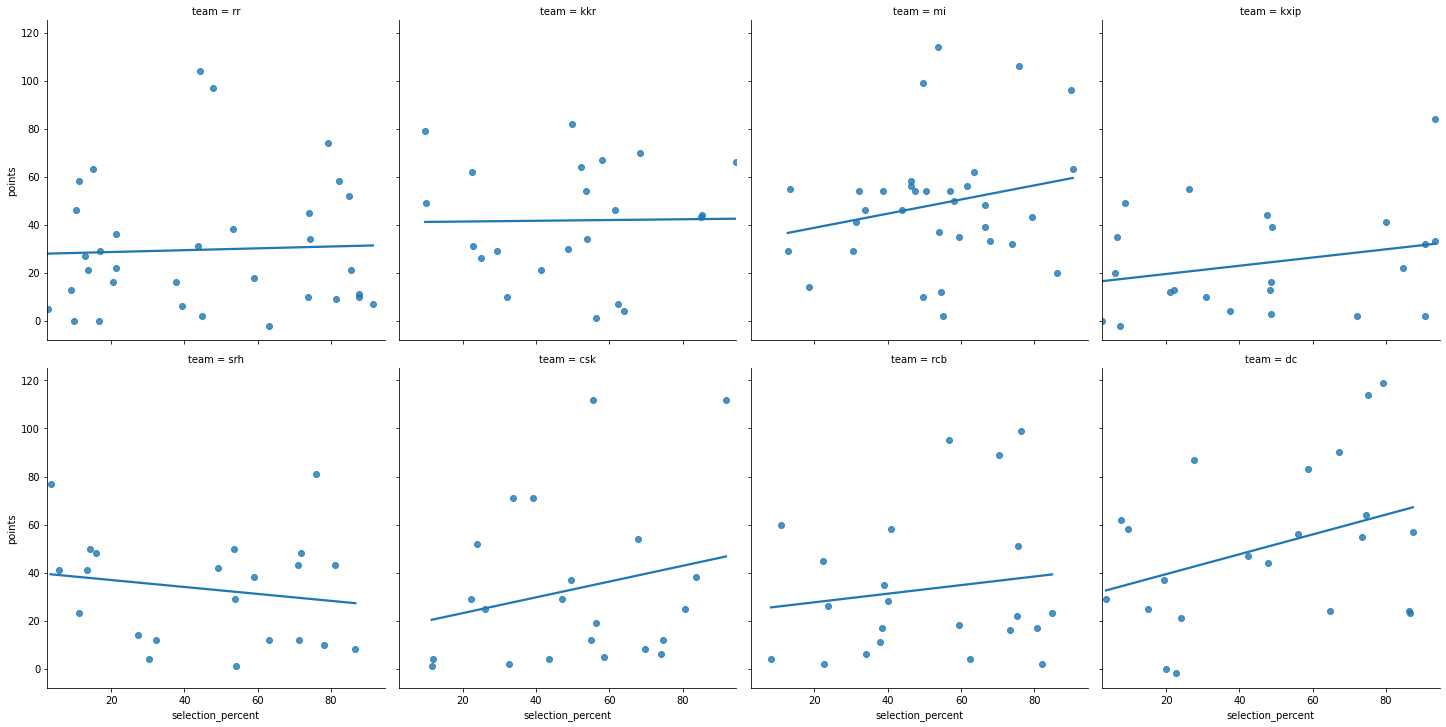

In [15]:
sns.lmplot(data=df, x="selection_percent", y="points", col="team", col_wrap=4, ci=False);

Now we will plot the same kind of graph with same meaning but this time with more depth. By depth I mean how correlated are the points and selection percentage for *each role* of *each team*

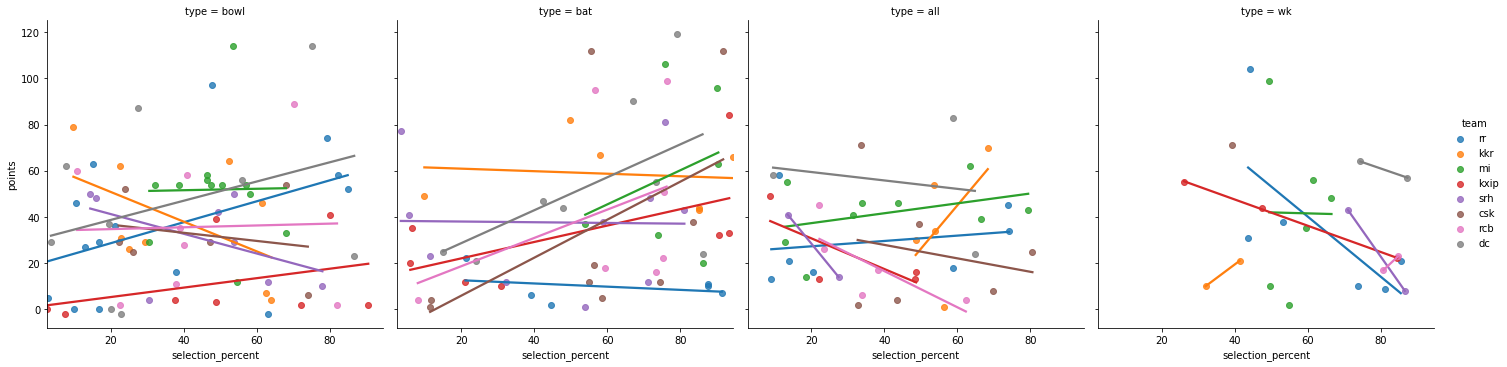

In [16]:
sns.lmplot(data=df, x="selection_percent", y="points", col="type", col_wrap=4, hue="team", ci=0);

During match day fill in the team name and then select individual roles for your dream team by inferring from the regression line


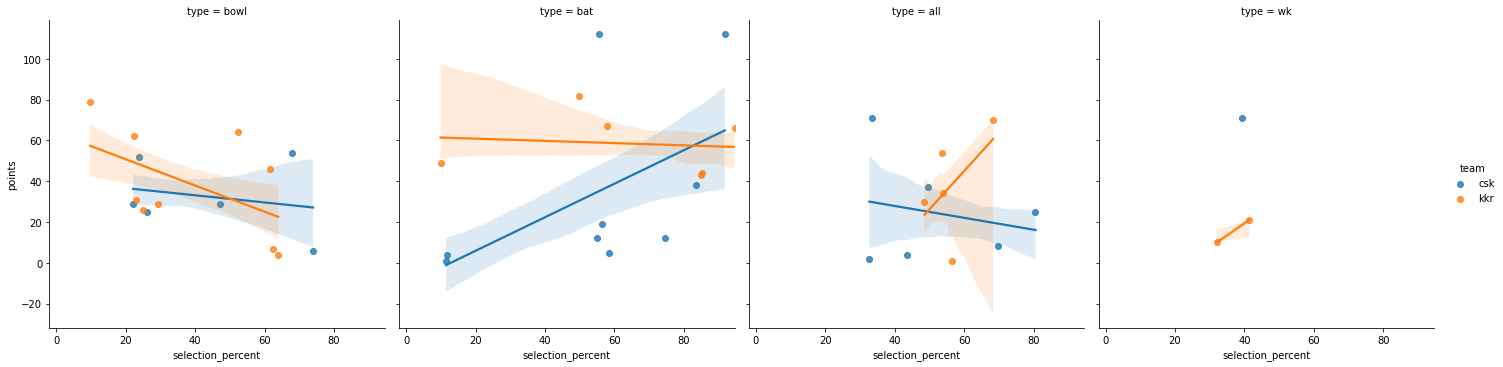

In [19]:
sns.lmplot(data=df, x="selection_percent", y="points", col="type", col_wrap=4, hue="team", hue_order=['csk','kkr'], ci=68);

# TO BE CONTINUED